In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

PHASE 1

Data Cleaning, Analysis and Visualization

This phase involves cleaning and preparing the dataset for analysis. It also includes exploratory data analysis to gain insights and detect patterns in the data. Additionally, visualization techniques will be used to present the insights more quickly.

In [3]:
data = pd.read_csv('//content//drive//MyDrive//MY DATA SCIENCE DOCS//PROJECT//Olabike.csv')

In [4]:
data

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data.isnull().sum()

instant       0
datetime      0
season        0
year          0
month         0
holidays      0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
data.duplicated().sum()

0

The Dataset has no missing and no duplicated data

In [8]:
parts = data["datetime"].str.split("-", n=3, expand=True)
data["day"] = parts[0].astype('int')
data["year"] = parts[2].astype('int')
data.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,01-01-2011,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,02-01-2011,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,03-01-2011,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,04-01-2011,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,05-01-2011,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
 16  day         731 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


In [10]:
data.drop('datetime', axis = 1,  inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holidays    731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  count       731 non-null    int64  
 15  day         731 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 91.5 KB


In [12]:
data.describe()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,366.000000,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,548.500000,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


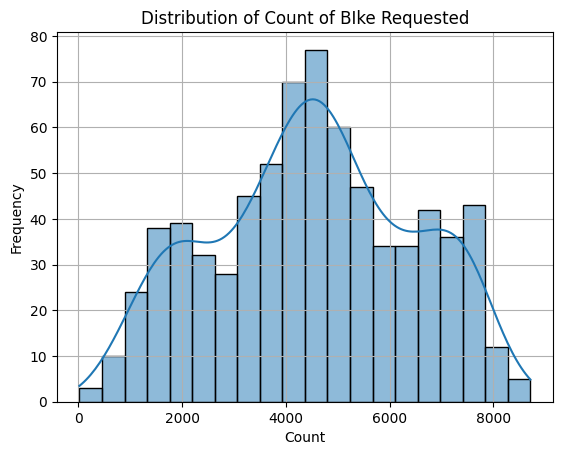

In [13]:
sns.histplot(data['count'], bins=20, kde=True)  # Histogram
plt.title('Distribution of Count of BIke Requested')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

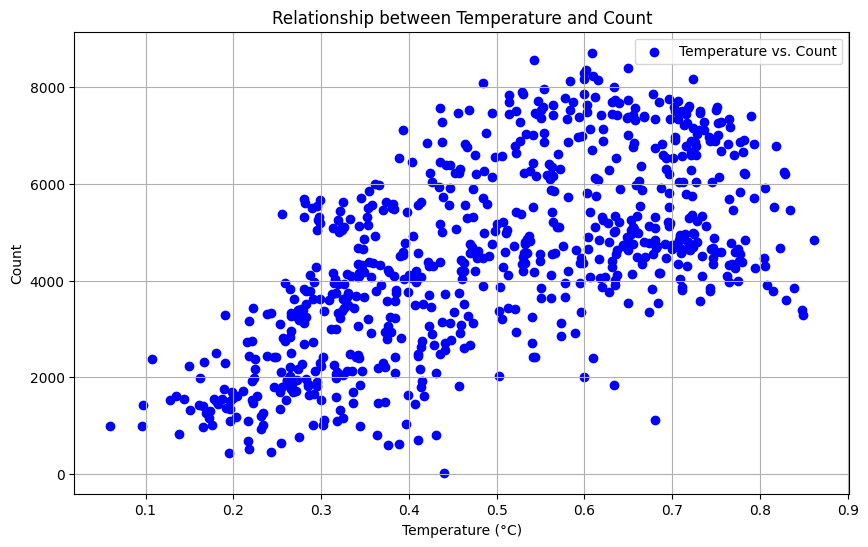

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter('temp', 'count', color='blue',data=data, label='Temperature vs. Count')
plt.title('Relationship between Temperature and Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

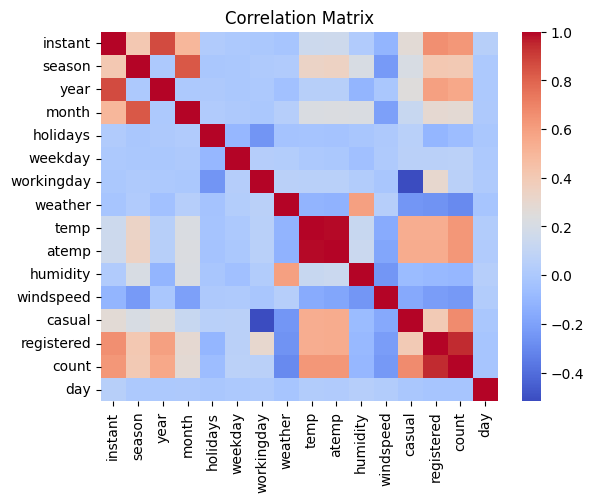

<Figure size 12000x4500 with 0 Axes>

In [15]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(120, 45))
plt.show()

In [16]:
dcrr = data.corr()

In [17]:
dcrr_round = round(dcrr, 1)

In [18]:
dcrr_round

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
instant,1.0,0.4,0.9,0.5,0.0,-0.0,-0.0,-0.0,0.2,0.2,0.0,-0.1,0.3,0.7,0.6,0.0
season,0.4,1.0,-0.0,0.8,-0.0,-0.0,0.0,0.0,0.3,0.3,0.2,-0.2,0.2,0.4,0.4,-0.0
year,0.9,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.1,-0.0,0.2,0.6,0.6,0.0
month,0.5,0.8,-0.0,1.0,0.0,0.0,-0.0,0.0,0.2,0.2,0.2,-0.2,0.1,0.3,0.3,0.0
holidays,0.0,-0.0,0.0,0.0,1.0,-0.1,-0.3,-0.0,-0.0,-0.0,-0.0,0.0,0.1,-0.1,-0.1,-0.0
weekday,-0.0,-0.0,-0.0,0.0,-0.1,1.0,0.0,0.0,-0.0,-0.0,-0.1,0.0,0.1,0.1,0.1,-0.0
workingday,-0.0,0.0,-0.0,-0.0,-0.3,0.0,1.0,0.1,0.1,0.1,0.0,-0.0,-0.5,0.3,0.1,0.0
weather,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.1,1.0,-0.1,-0.1,0.6,0.0,-0.2,-0.3,-0.3,-0.0
temp,0.2,0.3,0.0,0.2,-0.0,-0.0,0.1,-0.1,1.0,1.0,0.1,-0.2,0.5,0.5,0.6,0.0
atemp,0.2,0.3,0.0,0.2,-0.0,-0.0,0.1,-0.1,1.0,1.0,0.1,-0.2,0.5,0.5,0.6,0.0


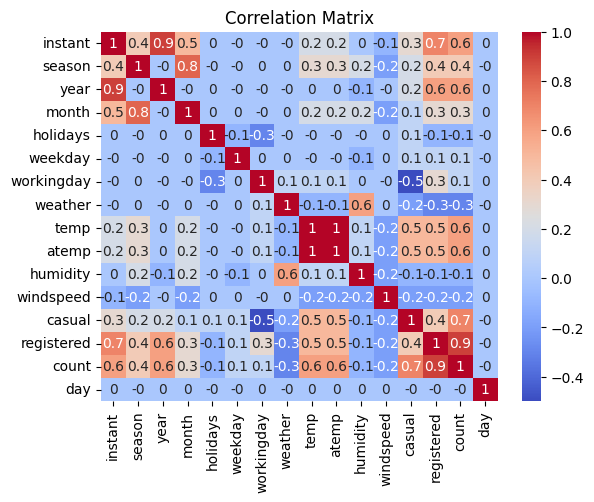

<Figure size 12000x4500 with 0 Axes>

In [19]:
sns.heatmap(dcrr_round,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(120, 45))
plt.show()

<ipython-input-20-91a8fe5ddc9b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


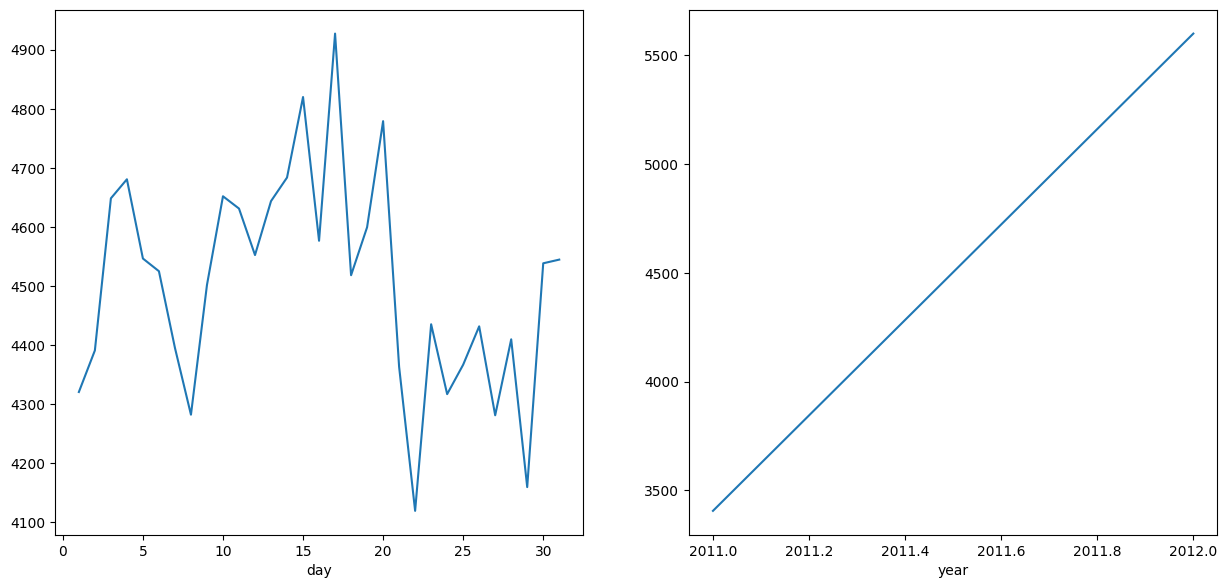

In [20]:
features = ['day', 'year']

plt.subplots(figsize=(15, 15))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col).mean()['count'].plot()
plt.show()

<ipython-input-21-c3bf8f454706>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


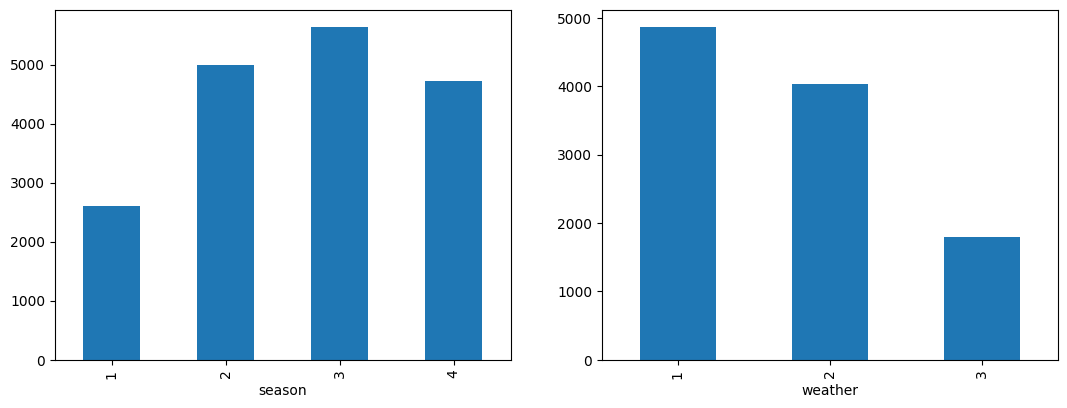

In [21]:
features = ['season', 'weather']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    data.groupby(col).mean()['count'].plot.bar()
plt.show()

<ipython-input-22-72fb88d11a74>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


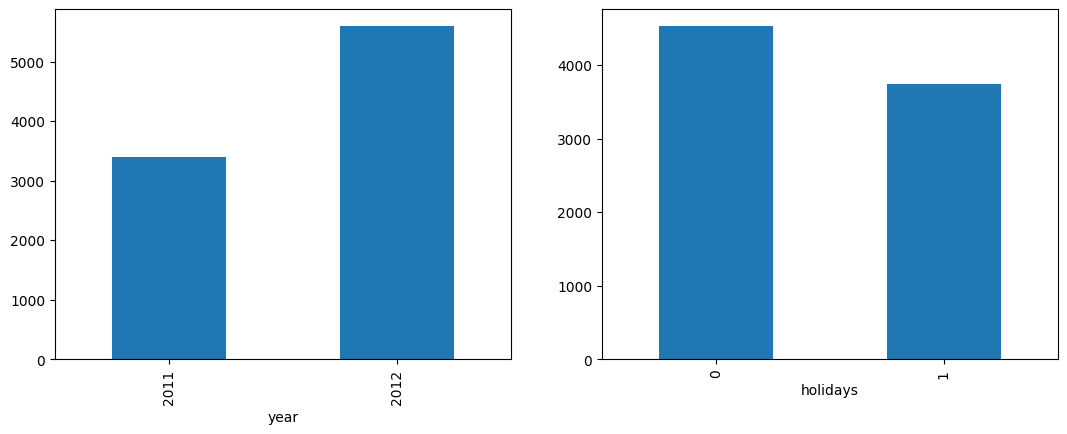

In [22]:
features = ['year', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    data.groupby(col).mean()['count'].plot.bar()
plt.show()

<ipython-input-23-e0a9201edb3b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


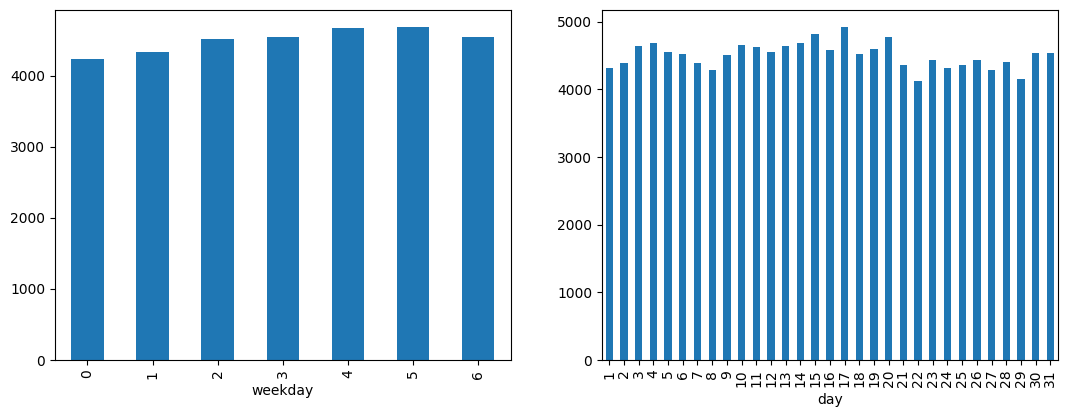

In [23]:
features = ['weekday', 'day']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    data.groupby(col).mean()['count'].plot.bar()
plt.show()

<ipython-input-24-3859939043ad>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


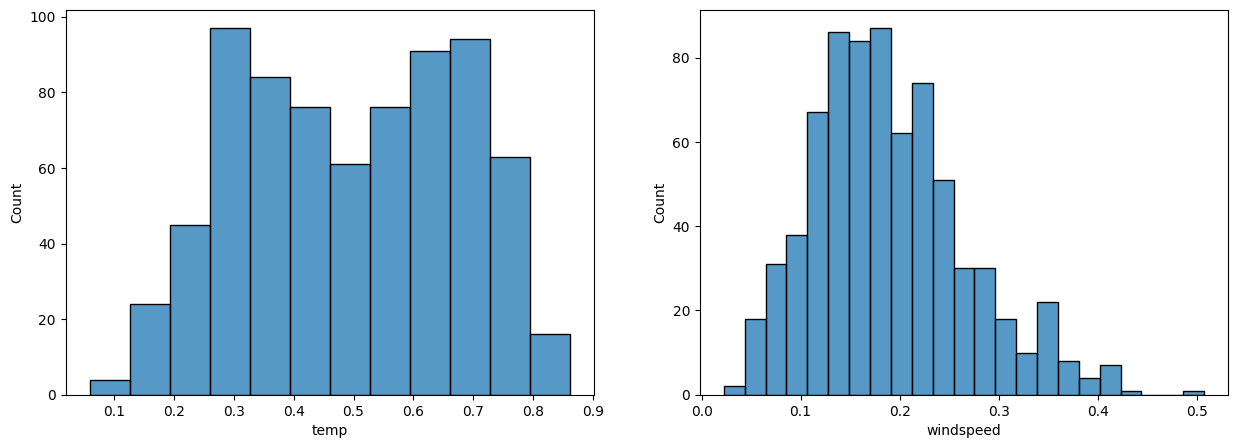

In [24]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sns.histplot(data[col])
plt.show()

<ipython-input-25-671fe899dbd6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


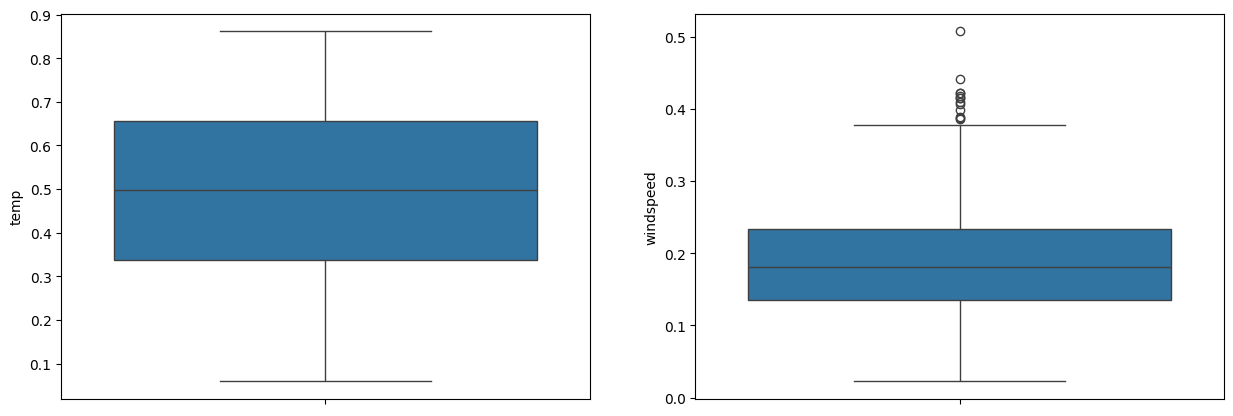

In [25]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sns.boxplot(data[col])
plt.show()

In [26]:
num_rows = data.shape[0] - data[data['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 0.


<ipython-input-27-bb66361427e9>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


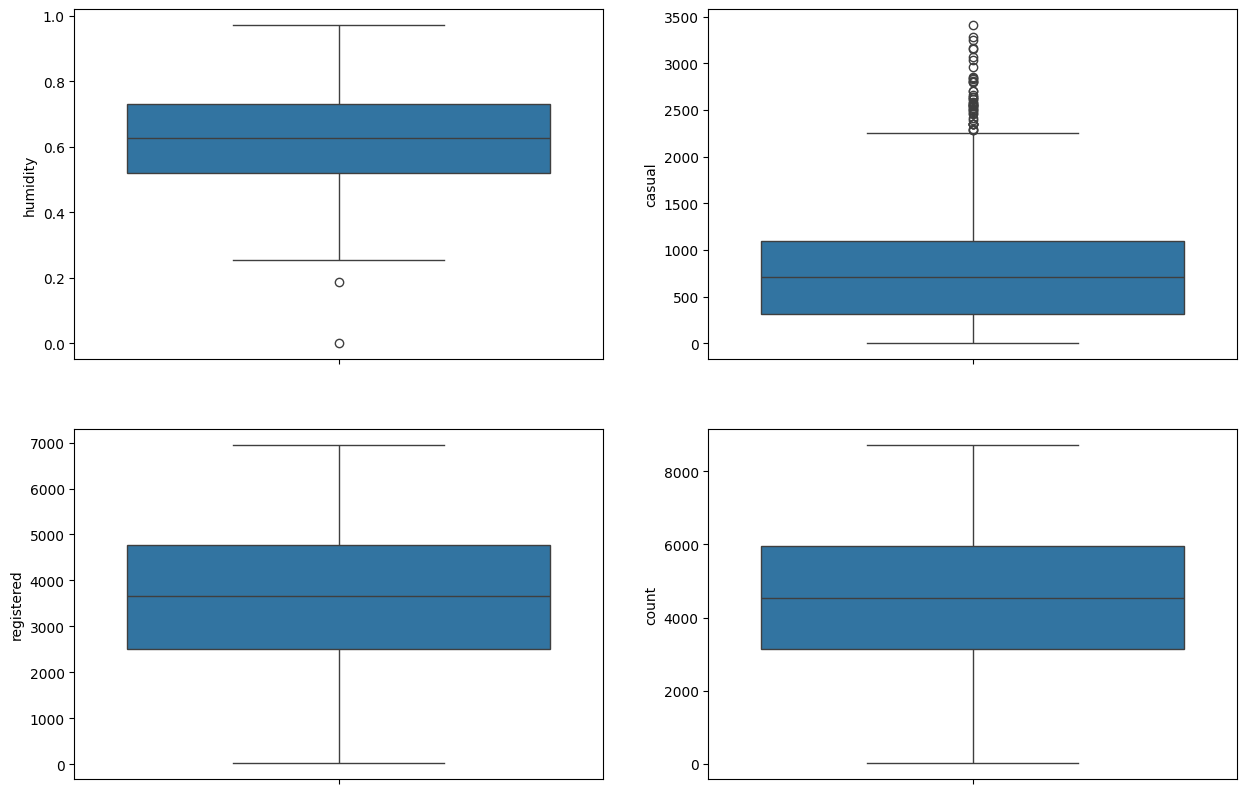

In [27]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[col])
plt.show()

Phase 2:
Data Clustering and Model Building

Phase Objective

This phase aims to group similar areas together using data clustering and build a machine-learning model that predicts ride-request demands based on the clustered data.
With a python code follow the Instructions:  
1.	Use the K-means algorithm to cluster data into groups.
2.	Use various machine learning algorithms and train them.
3.	Select and transform features that are relevant for demand forecasting.
4.	Evaluate the machine learning models using different techniques.

In [27]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score

In [28]:
X = data.drop('count', axis=1)
y = data['count'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.577692273772484e-23


In [33]:
r2 = r2_score(y_test, pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 1.0


In [34]:
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
pred2 = model2.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 11364.687008163264


In [37]:
r2 = r2_score(y_test, pred2)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9971658302687538


In [55]:
selected_features = X[['year', 'weekday', 'season', 'holidays', 'day', 'weather', 'month', 'workingday']]
selected_features

,year,weekday,season,holidays,day,weather,month,workingday
0,2011,6,1,0,1,2,1,0
1,2011,0,1,0,2,2,1,0
2,2011,1,1,0,3,1,1,1
3,2011,2,1,0,4,1,1,1
4,2011,3,1,0,5,1,1,1
...,...,...,...,...,...,...,...,...
726,2012,4,1,0,27,2,12,1
727,2012,5,1,0,28,2,12,1
728,2012,6,1,0,29,2,12,0
729,2012,0,1,0,30,1,12,0


In [56]:
unique_values = selected_features['workingday'].unique()
unique_values

array([0, 1])

In [58]:
season_map = {1: 'Spring', 2:"Summer", 3:'Fall', 4:'Winter'}
holidays_map = {0: 'No', 1:"Yes"}
working_map = {0: 'No', 1:"Yes"}
weather_map = {1: 'Clear', 2:"Mist", 3:'Light', 4:'Heavy Rain'}
weekday_map = {0: 'Monday', 1:"Tuesday", 2:'Wednessday', 3:'Thirsday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [60]:
selected_features['season'] = selected_features['season'].map(season_map)
selected_features['holidays'] = selected_features['holidays'].map(holidays_map)
selected_features['weather'] = selected_features['weather'].map(weather_map)
selected_features['weekday'] = selected_features['weekday'].map(weekday_map)
selected_features['workingday'] = selected_features['workingday'].map(working_map)

<ipython-input-60-99f0d8aa1871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['season'] = selected_features['season'].map(season_map)
<ipython-input-60-99f0d8aa1871>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['holidays'] = selected_features['holidays'].map(holidays_map)
<ipython-input-60-99f0d8aa1871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [61]:
selected_features

,year,weekday,season,holidays,day,weather,month,workingday
0,2011,NaN,NaN,NaN,1,NaN,1,No
1,2011,NaN,NaN,NaN,2,NaN,1,No
2,2011,NaN,NaN,NaN,3,NaN,1,Yes
3,2011,NaN,NaN,NaN,4,NaN,1,Yes
4,2011,NaN,NaN,NaN,5,NaN,1,Yes
...,...,...,...,...,...,...,...,...
726,2012,NaN,NaN,NaN,27,NaN,12,Yes
727,2012,NaN,NaN,NaN,28,NaN,12,Yes
728,2012,NaN,NaN,NaN,29,NaN,12,No
729,2012,NaN,NaN,NaN,30,NaN,12,No


Phase 3
Evaluating Various Model Approaches

Phase Objective
This phase aims to compare and evaluate the performance of different machine learning models, identify the best-performing model, and fine-tune it for better accuracy.
With a python code follow the Instructions:  
1.	Choose the best evaluation metrics that suite the model and the dataset
2.	Use cross-validation to evaluate the model's generalization performance.
3.	Visualize the results to gain insights into the model's strengths and weaknesses.

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cv_scores1 = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores1)

Cross-validation scores: [1. 1. 1. 1. 1.]


In [45]:
cv_scores2 = cross_val_score(model2, X, y, cv=5)
print("Cross-validation scores:", cv_scores2)

Cross-validation scores: [0.98138977 0.980838   0.96791985 0.94082737 0.9692456 ]


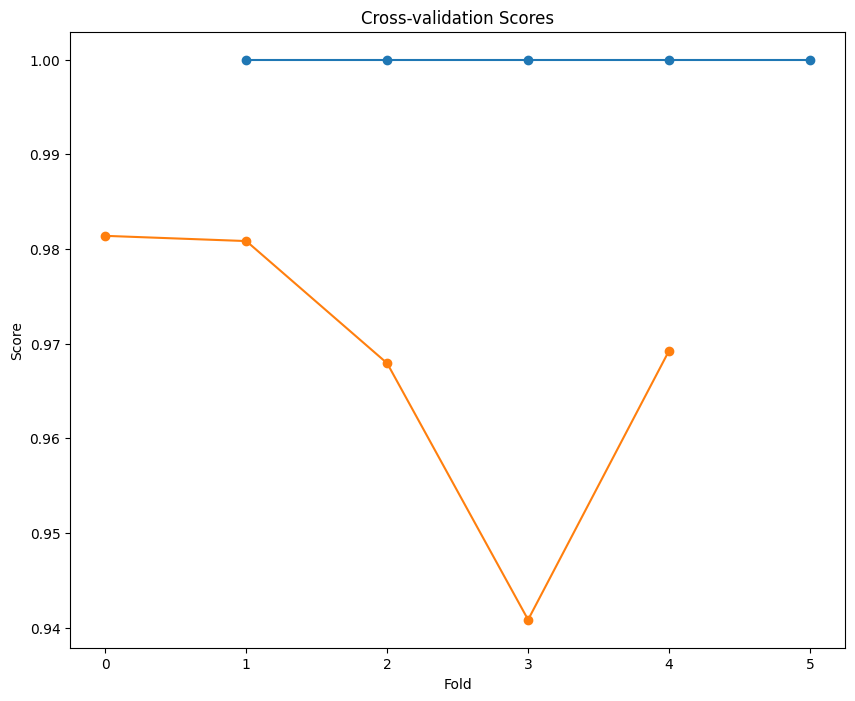

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 6), cv_scores1,cv_scores2, marker='o', linestyle='-')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.show()

In [47]:
import pickle

In [57]:
with open('C:\\Users\\USER\\OneDrive\\Documents\\MY DATA SCIENCE DOCS\\\PROJECT\model2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [48]:
X.columns

Index(['instant', 'season', 'year', 'month', 'holidays', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'day'],
      dtype='object')

In [51]:
X.describe()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,15.738714
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,8.809949
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,1.000000
25%,183.500000,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,8.000000
50%,366.000000,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,16.000000
75%,548.500000,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,23.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,31.000000
